# Put supplemental figure here to avoid clogging up other notebooks

### Load functions and packages

In [1]:
import sys,warnings
# Add common resources folder to path
sys.path.append('/glade/u/home/jonahshaw/Scripts/git_repos/internalvar-vs-obsunc/')
sys.path.append('/glade/u/home/jonahshaw/Scripts/git_repos/internalvar-vs-obsunc/Common/')

from imports import (
    np, xr, plt, sns, os,
    glob, dask, gridspec
    )

from functions import to_png

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Observations

In [2]:
obs_tseries_dir = '/glade/work/jonahshaw/trend_uncertainty/nathan/OBS_LENS/'
gistemp_5x5_dir = 'GISTEMP_5x5/'
hadcrut5_dir    = 'HadCRUT5/'

In [3]:
gistemp_tas_var = 'tempAnom'
hadcrut5_tas_var = 'tas'

In [4]:
# gistemp_5x5_spatial_trends_filepath  = glob.glob('%s/%s/*Spatial*.Percentiles*.nc' % (obs_tseries_dir,gistemp_5x5_dir))
# hadcrut5_spatial_trends_filepath     = glob.glob('%s/%s/*Spatial*.Percentiles*.nc' % (obs_tseries_dir,hadcrut5_dir))

In [5]:
gistemp_5x5_regional_trends_filepath  = glob.glob('%s/%s/*.196001-202012.trends.Percentiles*.nc' % (obs_tseries_dir,gistemp_5x5_dir))
hadcrut5_regional_trends_filepath     = glob.glob('%s/%s/*.196001-202012.trends.Percentiles*.nc' % (obs_tseries_dir,hadcrut5_dir))

Load the trend data

In [6]:
# gistemp_5x5_spatial_trends_all  = xr.open_dataarray(*gistemp_5x5_spatial_trends_filepath).drop('startyear')
# hadcrut5_spatial_trends_all     = xr.open_dataarray(*hadcrut5_spatial_trends_filepath).drop('startyear').rename({'longitude':'lon','latitude':'lat'})

In [7]:
gistemp_5x5_regional_trends_all  = xr.open_dataarray(*gistemp_5x5_regional_trends_filepath).drop('startyear')
hadcrut5_regional_trends_all     = xr.open_dataarray(*hadcrut5_regional_trends_filepath).drop('startyear')

### Simpler Comparison Figures for GISTEMP and HadCRUT

Text(0.5, 0.9, 'Comparison of GISTEMP and HadCRUT Median Trends')

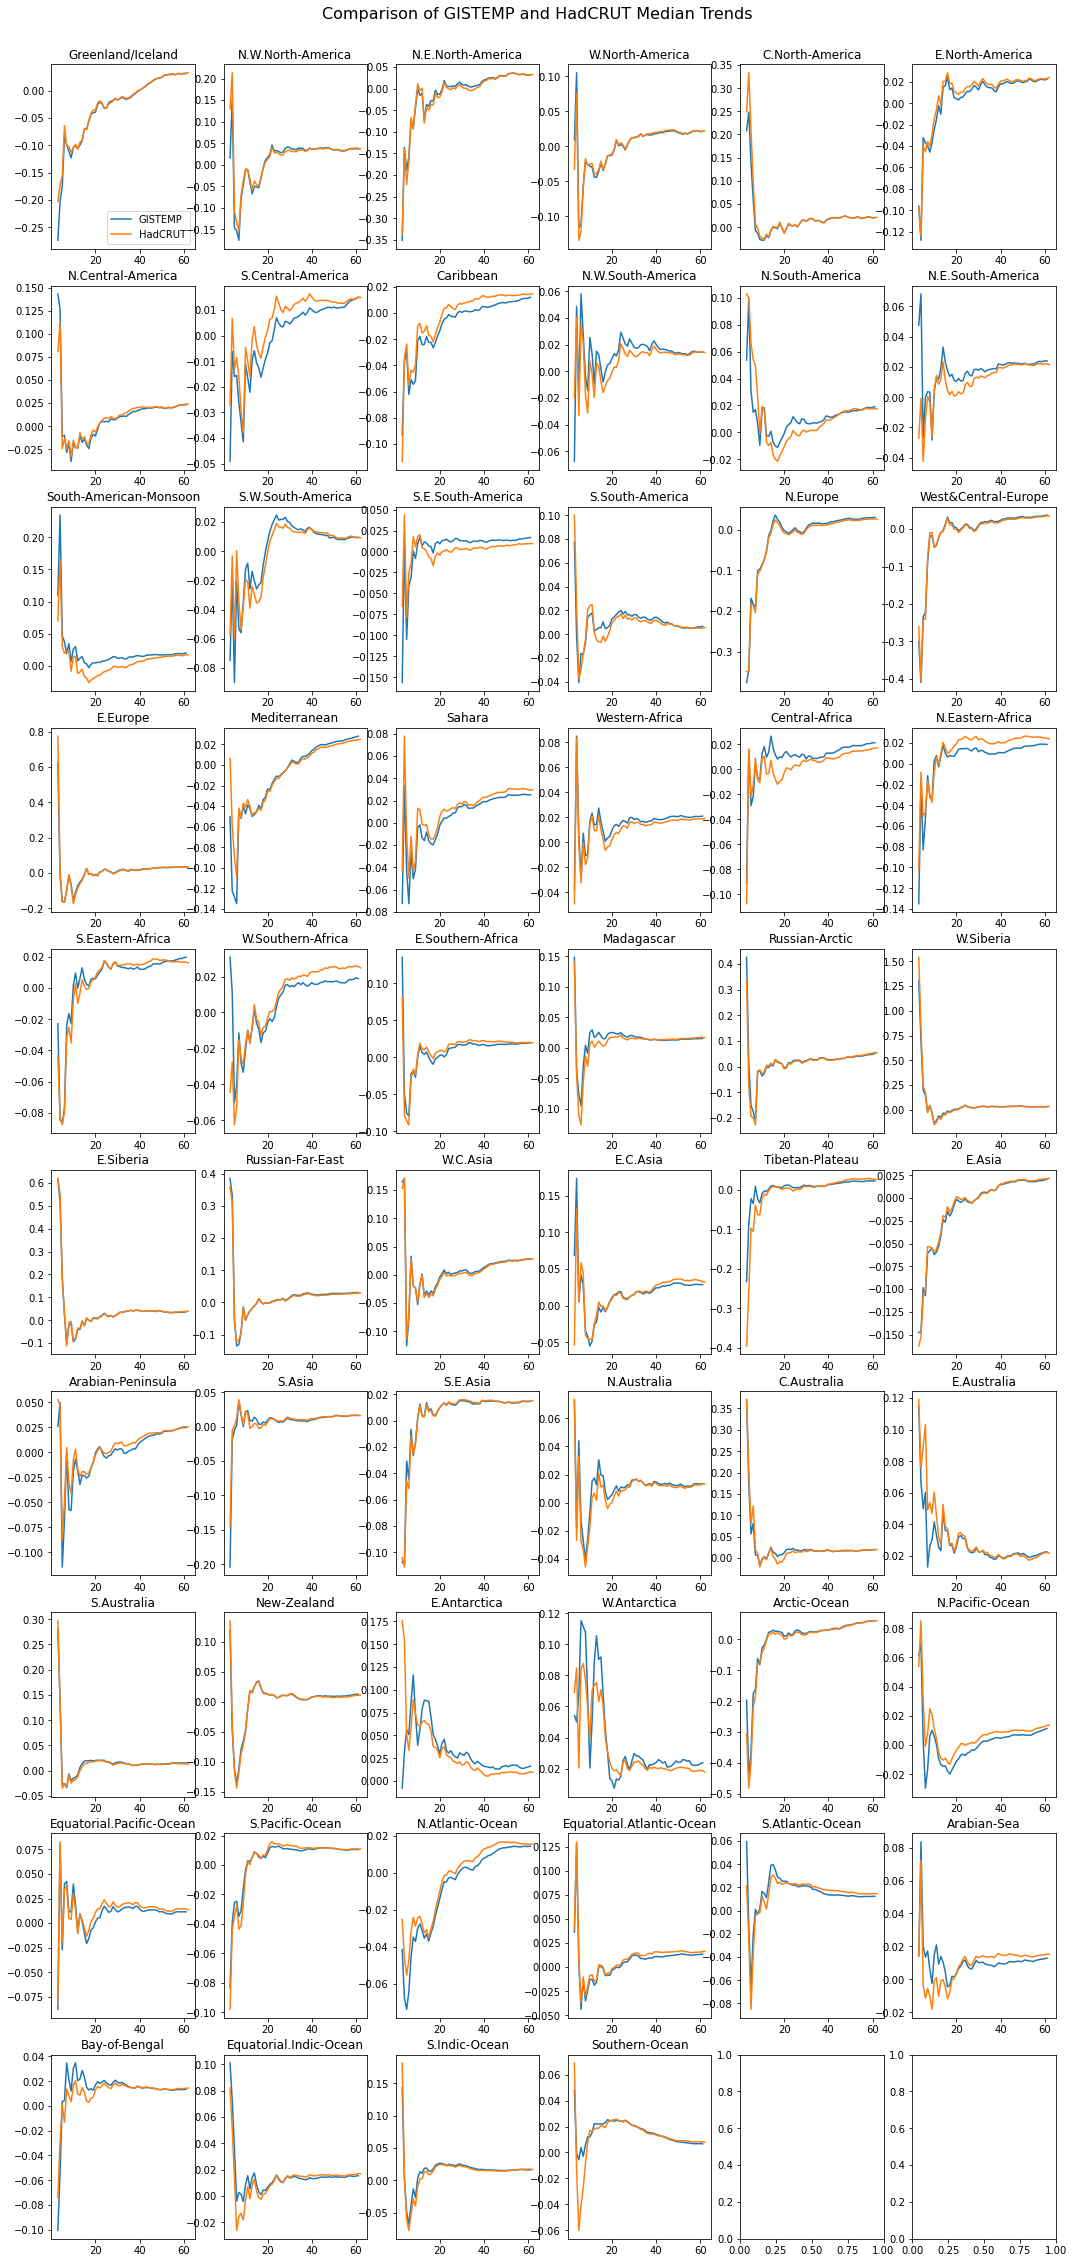

In [8]:
fig,axs = plt.subplots(nrows=10,ncols=6,figsize=(18,40))
axs = axs.flat

for i,_ax in zip(gistemp_5x5_regional_trends_all.RegionIndex,axs):
        
    _gistemp_data = gistemp_5x5_regional_trends_all.sel(RegionIndex=i,percentile=50.0)
    _hadcrut_data = hadcrut5_regional_trends_all.sel(RegionIndex=i,percentile=50.0)
    
    _ax.plot(_gistemp_data.duration,_gistemp_data,label='GISTEMP')
    _ax.plot(_hadcrut_data.duration,_hadcrut_data,label='HadCRUT')
    
    _ax.set_title(_gistemp_data.RegionName.values)
    
axs[0].legend()

fig.suptitle('Comparison of GISTEMP and HadCRUT Median Trends',fontsize=16,y=0.9)

Text(0.5, 0.9, 'Comparison of GISTEMP and HadCRUT Trend Spread (95% Confidence Interval)')

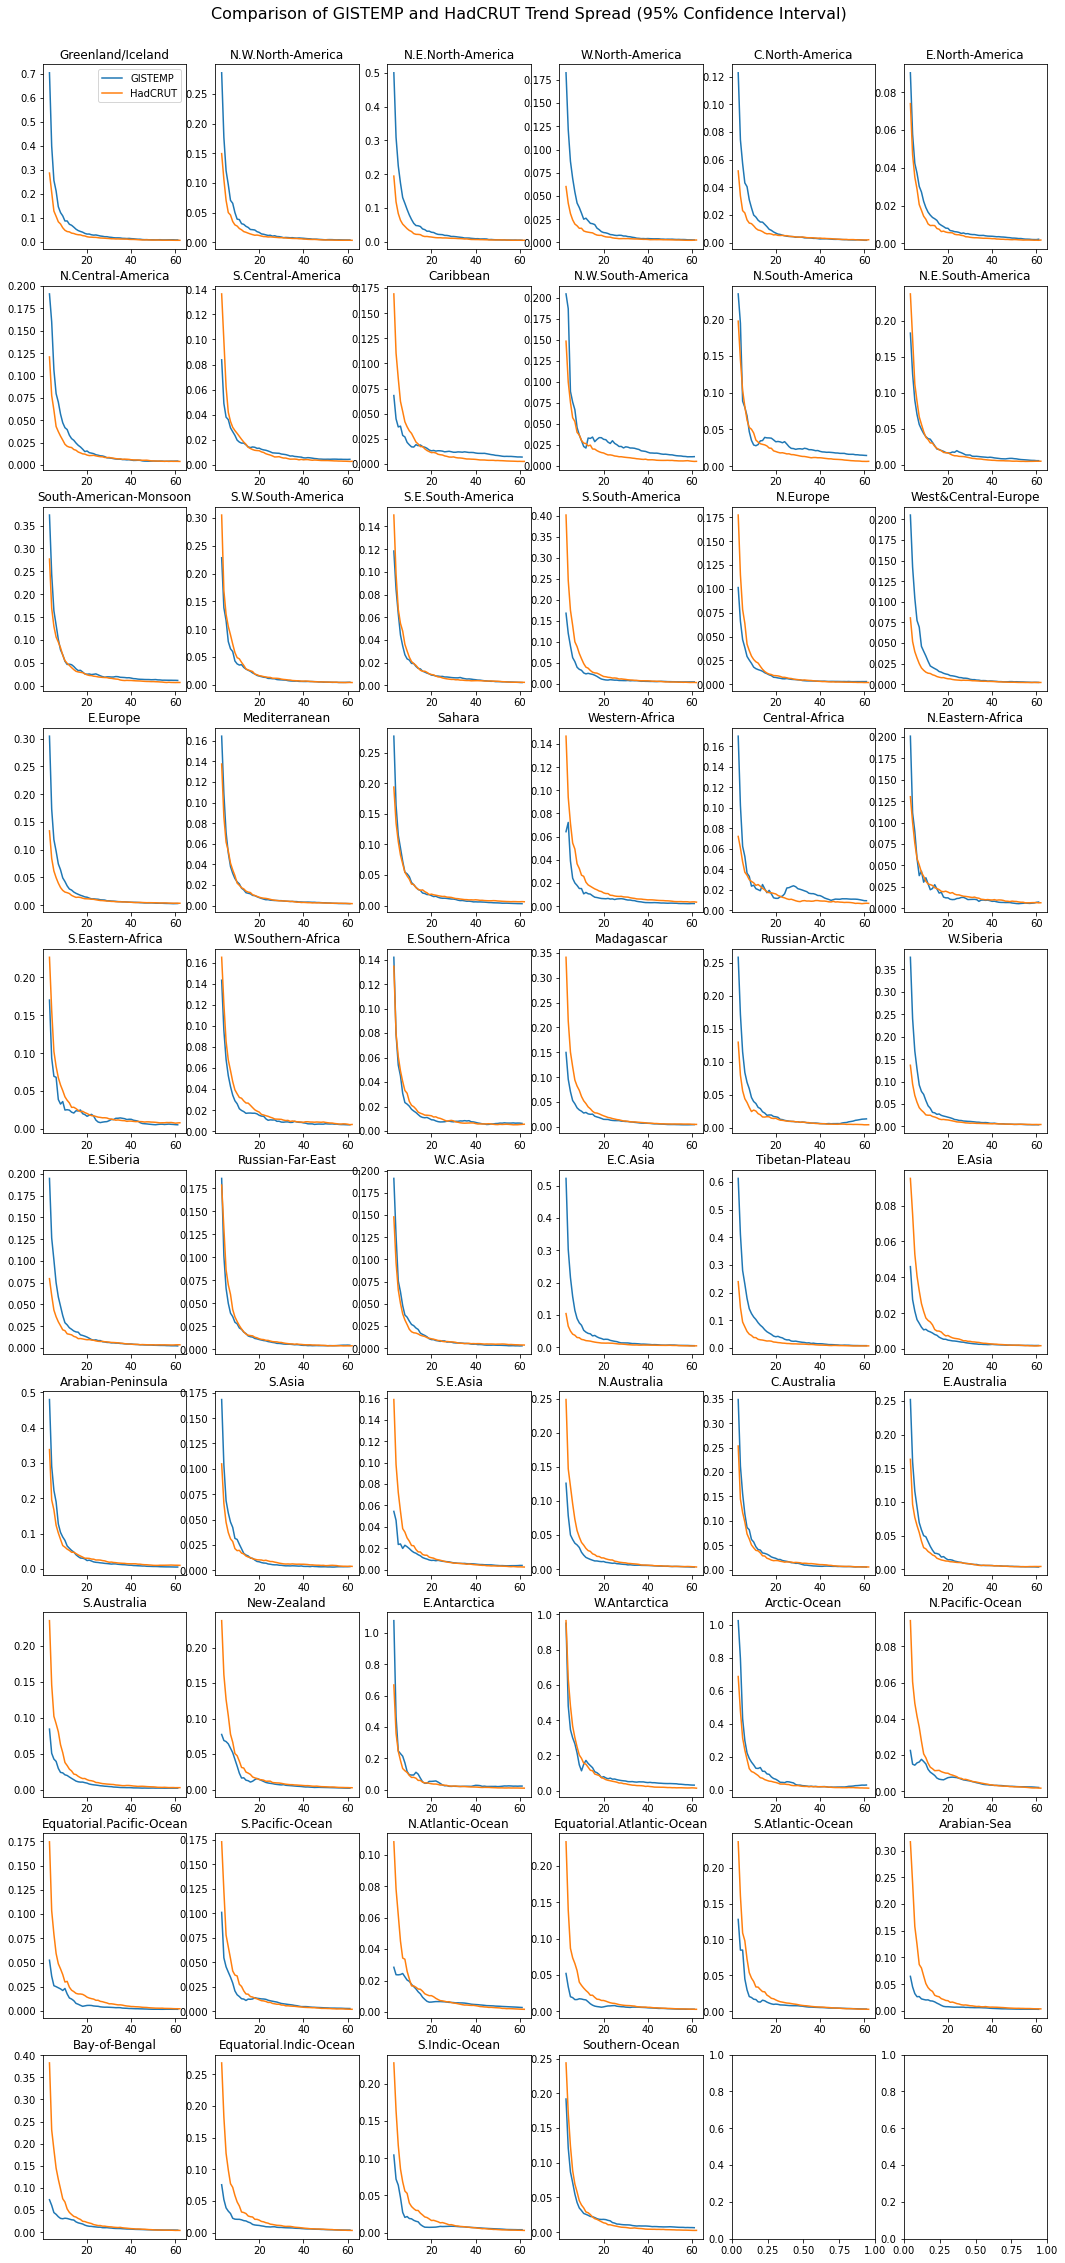

In [9]:
fig,axs = plt.subplots(nrows=10,ncols=6,figsize=(18,40))
axs = axs.flat

for i,_ax in zip(gistemp_5x5_regional_trends_all.RegionIndex,axs):
        
    _gistemp_data = gistemp_5x5_regional_trends_all.sel(RegionIndex=i,percentile=97.5) - gistemp_5x5_regional_trends_all.sel(RegionIndex=i,percentile=2.5)
    _hadcrut_data = hadcrut5_regional_trends_all.sel(RegionIndex=i,percentile=97.5) - hadcrut5_regional_trends_all.sel(RegionIndex=i,percentile=2.5)
    
    _ax.plot(_gistemp_data.duration,_gistemp_data,label='GISTEMP')
    _ax.plot(_hadcrut_data.duration,_hadcrut_data,label='HadCRUT')
    
    _ax.set_title(_gistemp_data.RegionName.values)
    
axs[0].legend()

fig.suptitle('Comparison of GISTEMP and HadCRUT Trend Spread (95% Confidence Interval)',fontsize=16,y=0.9)